In [1]:
import pandas as pd

In [2]:
import descartes
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline


In [3]:
pop_by_county = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\Iowa population by county from Iowa demographics.csv')

In [ ]:
# pop_by_county[['County','Population']]

In [4]:
# s.replace('is','was')
pop_by_county['county2'] = pop_by_county.County.str.replace('County','')
pop_by_county['county2'] = pop_by_county['county2'].str.rstrip()
pop_by_county['county2'] = pop_by_county['county2'].str.lstrip()
pop_by_county['county2'] = pop_by_county['county2'].str.lower()

In [5]:
# pop_by_county.set_index('county2')
pop_by_county.head()

,Rank,County,Population,county2
0,1,Polk County,485418,polk
1,2,Linn County,225601,linn
2,3,Scott County,172938,scott
3,4,Johnson County,150819,johnson
4,5,Black Hawk County,131813,black hawk


In [14]:
sdtypes = {'Store_Number':str,'Zip_Code':str, 'Store_Location':str, 'County_Number':str}

In [15]:
stores = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_2021.csv',index_col=0, dtype=sdtypes)

In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 223124 to 1094183
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Store_Number    1948 non-null   object
 1   Store_Name      1948 non-null   object
 2   Address         1948 non-null   object
 3   City            1948 non-null   object
 4   Zip_Code        1948 non-null   object
 5   Store_Location  1790 non-null   object
 6   County_Number   1948 non-null   object
 7   County          1948 non-null   object
dtypes: object(8)
memory usage: 137.0+ KB


In [50]:
store_locations = stores[['Store_Name','Store_Location']]

#from documentation

d = {'col1': ['name1', 'name2'], 'wkt': ['POINT (1 2)', 'POINT (2 1)']}

df = pd.DataFrame(d)

gs = geopandas.GeoSeries.from_wkt(df['wkt'])

gdf = geopandas.GeoDataFrame(df, geometry=gs, crs="EPSG:4326")


### from Sam

where locations is your db with the store data, and 'StoreLocation' is the name of the column

from shapely import wkt

locations['StoreLocation'].apply(wkt.loads)

In [ ]:
from shapely import wkt

locations['StoreLocation'].apply(wkt.loads)

In [62]:
stores.Store_Location

223124                                      NaN
231153             POINT (-95.752119 43.397431)
239961              POINT (-95.143701 43.12759)
246141             POINT (-94.681939 43.111913)
262897             POINT (-94.953239 42.777449)
                           ...                 
1086261    POINT (-94.73259400000002 40.991872)
1086262    POINT (-95.81799900000001 41.280148)
1086263            POINT (-91.553462 42.037621)
1086241            POINT (-94.173816 42.501131)
1094183            POINT (-93.833455 41.614719)
Name: Store_Location, Length: 1948, dtype: object

In [52]:
locations = stores[['Store_Name','Store_Location']]
locations = locations.dropna()
# store_locations
locations['Store_Location'].apply(wkt.loads)
# where locations is your db with the store data, and 'StoreLocation' is the name of the column

231153             POINT (-95.752119 43.397431)
239961              POINT (-95.143701 43.12759)
246141             POINT (-94.681939 43.111913)
262897             POINT (-94.953239 42.777449)
262310             POINT (-91.473634 43.262114)
                           ...                 
1086261    POINT (-94.73259400000002 40.991872)
1086262    POINT (-95.81799900000001 41.280148)
1086263            POINT (-91.553462 42.037621)
1086241            POINT (-94.173816 42.501131)
1094183            POINT (-93.833455 41.614719)
Name: Store_Location, Length: 1790, dtype: object

In [30]:
# create lists for dicitionary creation

names = list(locations.Store_Name)
# print('type(names) = ', type(names))

points = list(locations.Store_Location)
type(points)

type(names) =  <class 'list'>


list

In [31]:
#create dictionary

d = {'col1':names, 'geometry':points }

<AxesSubplot:>

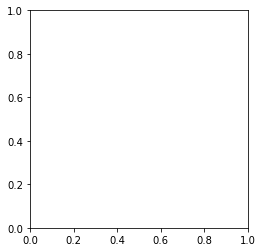

In [56]:
# create GeoDataFrame from dictionary

loc_gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
loc_gdf.plot()

In [35]:
type(loc_gdf)

geopandas.geodataframe.GeoDataFrame

In [55]:
type(loc_gdf.geometry)

geopandas.geoseries.GeoSeries

#from documentaiton
 
d = {'col1': ['name1', 'name2'], 'geometry': [Point(1, 2), Point(2, 1)]}

gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")

gdf

In [ ]:
# from geopandas import GeoSeries
# store_locations = stores[['Store_Name','Store_Location']]
# store_locations = store_locations.dropna()
# store_locations.columns = ['name','geometry']
# locations_gpd = gpd.GeoDataFrame(store_locations, crs="EPSG:4326")

In [ ]:
# type(locations_gpd)

read in us shape file

In [36]:

us = gpd.read_file(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\us-county-boundaries.shp')

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [37]:
us.head(2)

,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry
0,39,063,01074044,39063,Hancock,Hancock County,OH,06,H1,G4020,...,22300,None,A,1.376126e+09,6020647.0,+41.0004711,-083.6660335,Ohio,63,"POLYGON ((-83.88076 41.08036, -83.88076 41.081..."
1,51,179,01480173,51179,Stafford,Stafford County,VA,06,H1,G4020,...,47900,47894,A,6.972372e+08,28088011.0,+38.4132608,-077.4513342,Virginia,179,"POLYGON ((-77.58878 38.50404, -77.58295 38.508..."


create Iowa geodataframe


In [38]:
iowa = us[us.stusab == "IA"]

In [39]:
type(iowa)

geopandas.geodataframe.GeoDataFrame

create merge key

In [40]:
iowa['county2'] = iowa.name.str.lower()

C:\Users\dgarb\AppData\Local\Temp/ipykernel_18444/2015023351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iowa['county2'] = iowa.name.str.lower()


In [41]:
type(iowa)

geopandas.geodataframe.GeoDataFrame

merge iowa shape file with pop_by_county by county2

Note to create a geodataframe, the geodataframe must be on the left of the merge

In [42]:

pop_by_county = pop_by_county[['county2','Population']]

iowa_pop_gdf = iowa.merge(pop_by_county,how='inner')

In [43]:
type(iowa_pop_gdf)

geopandas.geodataframe.GeoDataFrame

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


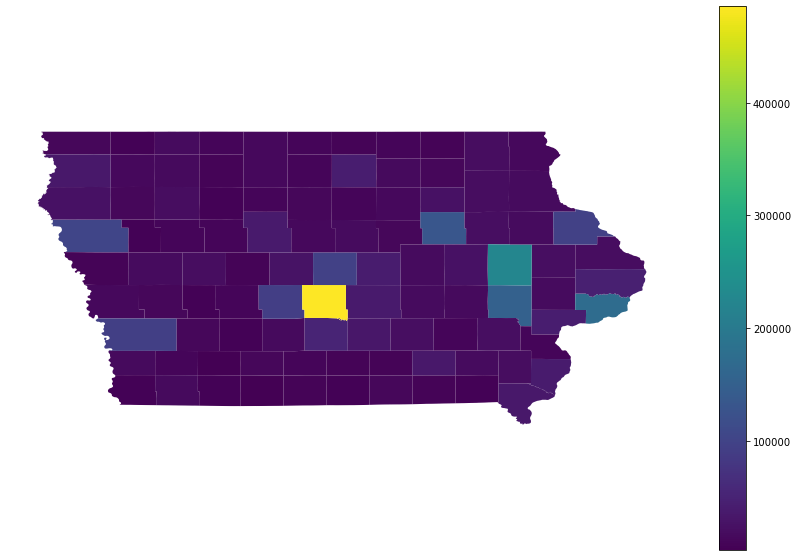

In [44]:
ax = iowa_pop_gdf.plot(column='Population',legend = True, figsize=(15, 10))
ax.set_axis_off(); # turns off axis labels

In [61]:
loc_gdf = gpd.GeoDataFrame(d, crs=iowa_pop_gdf.crs)
type(loc_gdf)
loc_gdf

,col1,geometry
0,Dyno's #53 / Sibley,POINT (-95.752119 43.397431)
1,Dyno's #40 / Spencer,POINT (-95.143701 43.12759)
2,Dyno's #29 / Emmetsburg,POINT (-94.681939 43.111913)
3,Dyno's #41 / Albert City,POINT (-94.953239 42.777449)
4,Double D Liquor Store,POINT (-91.473634 43.262114)
...,...,...
1785,Hy-Vee Food Store / Corning,POINT (-94.73259400000002 40.991872)
1786,Fareway Stores #073 / Council Bluffs,POINT (-95.81799900000001 41.280148)
1787,Casey's General Store #2924 / Marion,POINT (-91.553462 42.037621)
1788,Hiway 20 Liquor and Tobacco / Fort Dodge,POINT (-94.173816 42.501131)


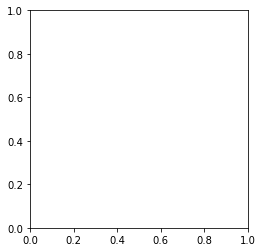

In [58]:
loc_gdf.plot(marker='*', markersize=5);
# locations_gpd.to_crs(iowa_pop_gdf)

In [ ]:
iowa = us[us.stusab == "IA"]
iowa = iowac

iowa['area'] = iowa.area
iowa['area'].head()

In [ ]:
# iowa.head(3)
# iowa.info()